In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime import lime_tabular

Carichiamo i dati 

In [2]:
data = load_breast_cancer()
X, y = data['data'], data['target']

print(X)
print(y)


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

Print per vedere se maligno o benigno

In [3]:

print(data['target_names'])

['malignant' 'benign']


Usiamo un tree classifier come primo approccio ma cosi non avremmo bisogno di lime in realta

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
print(tree_clf.score(X_test, y_test))

0.8947368421052632


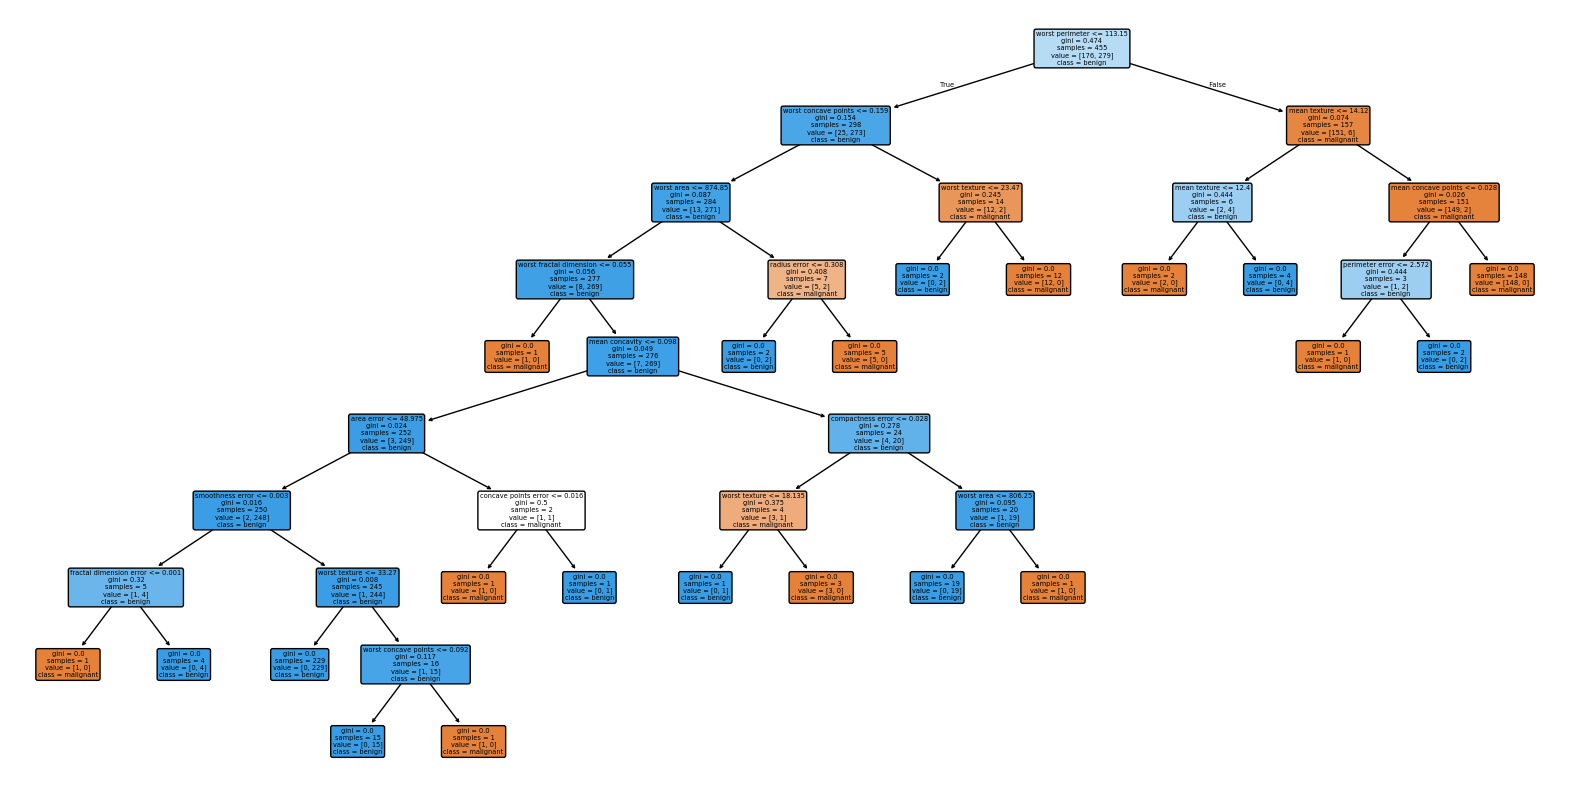

In [5]:
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=data['feature_names'], class_names=data['target_names'],rounded=True)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
print('accuracy forest classifier:', forest_clf.score(X_test, y_test))

accuracy forest classifier: 0.9824561403508771


Qua vediamo l'importanza che viene data alle varie feature ma non sappiamo perchè

In [7]:
print(dict(zip(data['feature_names'], forest_clf.feature_importances_)))

{np.str_('mean radius'): np.float64(0.03942540559011781), np.str_('mean texture'): np.float64(0.010484654334986528), np.str_('mean perimeter'): np.float64(0.053096666662842955), np.str_('mean area'): np.float64(0.035560671697321626), np.str_('mean smoothness'): np.float64(0.007152027016360305), np.str_('mean compactness'): np.float64(0.010831926159914941), np.str_('mean concavity'): np.float64(0.06809608529021549), np.str_('mean concave points'): np.float64(0.10758960150835362), np.str_('mean symmetry'): np.float64(0.003996262245544146), np.str_('mean fractal dimension'): np.float64(0.0030368856681552503), np.str_('radius error'): np.float64(0.013286302778007842), np.str_('texture error'): np.float64(0.004995320541457746), np.str_('perimeter error'): np.float64(0.020970159007129844), np.str_('area error'): np.float64(0.07001627434016021), np.str_('smoothness error'): np.float64(0.003579473860819078), np.str_('compactness error'): np.float64(0.00521631006687952), np.str_('concavity erro

Ora usiamo lime per spiegare queste scelte che vengono fatte

Correct:  Malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(11.08), np.str_('mean texture'): np.float64(18.83), np.str_('mean perimeter'): np.float64(73.3), np.str_('mean area'): np.float64(361.6), np.str_('mean smoothness'): np.float64(0.1216), np.str_('mean compactness'): np.float64(0.2154), np.str_('mean concavity'): np.float64(0.1689), np.str_('mean concave points'): np.float64(0.06367), np.str_('mean symmetry'): np.float64(0.2196), np.str_('mean fractal dimension'): np.float64(0.0795), np.str_('radius error'): np.float64(0.2114), np.str_('texture error'): np.float64(1.027), np.str_('perimeter error'): np.float64(1.719), np.str_('area error'): np.float64(13.99), np.str_('smoothness error'): np.float64(0.007405), np.str_('compactness error'): np.float64(0.04549), np.str_('concavity error'): np.float64(0.04588), np.str_('concave points error'): np.float64(0.01339), np.str_('symmetry error'): np.float64(0.01738), np.str_('fractal dimension error'): np.float64(0.004435

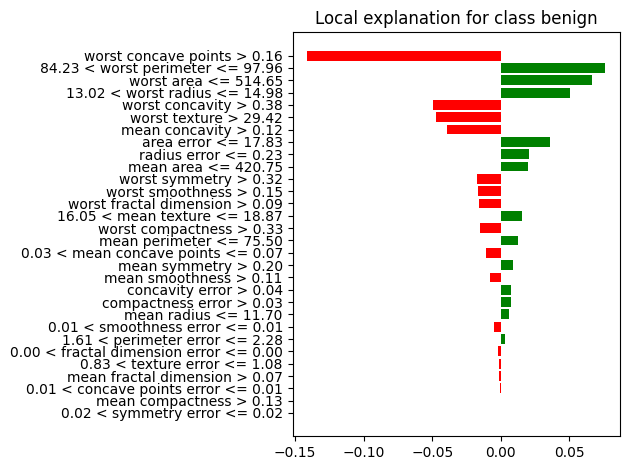

Correct:  Malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(18.05), np.str_('mean texture'): np.float64(16.15), np.str_('mean perimeter'): np.float64(120.2), np.str_('mean area'): np.float64(1006.0), np.str_('mean smoothness'): np.float64(0.1065), np.str_('mean compactness'): np.float64(0.2146), np.str_('mean concavity'): np.float64(0.1684), np.str_('mean concave points'): np.float64(0.108), np.str_('mean symmetry'): np.float64(0.2152), np.str_('mean fractal dimension'): np.float64(0.06673), np.str_('radius error'): np.float64(0.9806), np.str_('texture error'): np.float64(0.5505), np.str_('perimeter error'): np.float64(6.311), np.str_('area error'): np.float64(134.8), np.str_('smoothness error'): np.float64(0.00794), np.str_('compactness error'): np.float64(0.05839), np.str_('concavity error'): np.float64(0.04658), np.str_('concave points error'): np.float64(0.0207), np.str_('symmetry error'): np.float64(0.02591), np.str_('fractal dimension error'): np.float64(0.007054

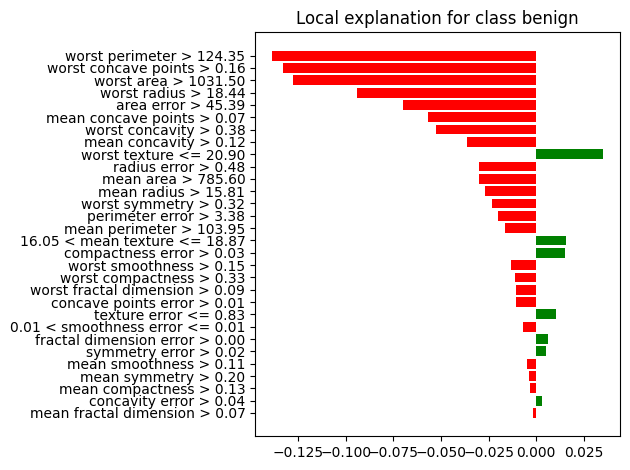

Correct:  Malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(15.53), np.str_('mean texture'): np.float64(33.56), np.str_('mean perimeter'): np.float64(103.7), np.str_('mean area'): np.float64(744.9), np.str_('mean smoothness'): np.float64(0.1063), np.str_('mean compactness'): np.float64(0.1639), np.str_('mean concavity'): np.float64(0.1751), np.str_('mean concave points'): np.float64(0.08399), np.str_('mean symmetry'): np.float64(0.2091), np.str_('mean fractal dimension'): np.float64(0.0665), np.str_('radius error'): np.float64(0.2419), np.str_('texture error'): np.float64(1.278), np.str_('perimeter error'): np.float64(1.903), np.str_('area error'): np.float64(23.02), np.str_('smoothness error'): np.float64(0.005345), np.str_('compactness error'): np.float64(0.02556), np.str_('concavity error'): np.float64(0.02889), np.str_('concave points error'): np.float64(0.01022), np.str_('symmetry error'): np.float64(0.009947), np.str_('fractal dimension error'): np.float64(0.0033

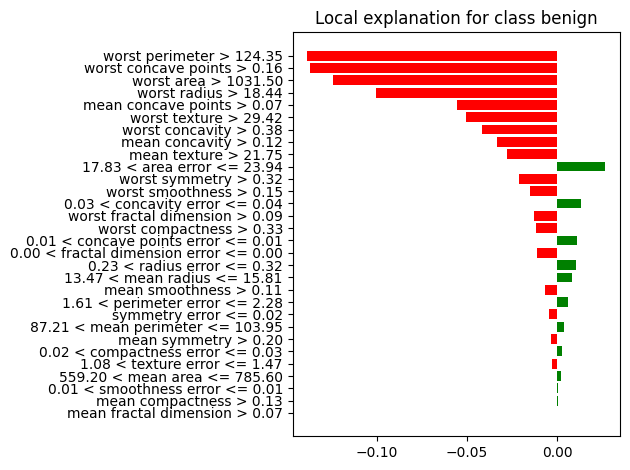

Correct:  Malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(18.82), np.str_('mean texture'): np.float64(21.97), np.str_('mean perimeter'): np.float64(123.7), np.str_('mean area'): np.float64(1110.0), np.str_('mean smoothness'): np.float64(0.1018), np.str_('mean compactness'): np.float64(0.1389), np.str_('mean concavity'): np.float64(0.1594), np.str_('mean concave points'): np.float64(0.08744), np.str_('mean symmetry'): np.float64(0.1943), np.str_('mean fractal dimension'): np.float64(0.06132), np.str_('radius error'): np.float64(0.8191), np.str_('texture error'): np.float64(1.931), np.str_('perimeter error'): np.float64(4.493), np.str_('area error'): np.float64(103.9), np.str_('smoothness error'): np.float64(0.008074), np.str_('compactness error'): np.float64(0.04088), np.str_('concavity error'): np.float64(0.05321), np.str_('concave points error'): np.float64(0.01834), np.str_('symmetry error'): np.float64(0.02383), np.str_('fractal dimension error'): np.float64(0.004

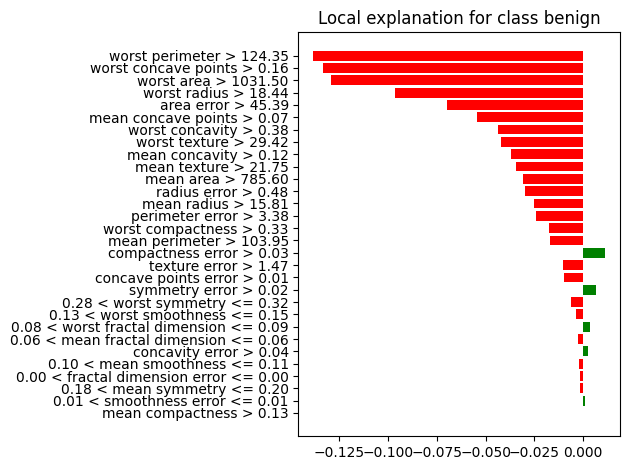

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(12.27), np.str_('mean texture'): np.float64(17.92), np.str_('mean perimeter'): np.float64(78.41), np.str_('mean area'): np.float64(466.1), np.str_('mean smoothness'): np.float64(0.08685), np.str_('mean compactness'): np.float64(0.06526), np.str_('mean concavity'): np.float64(0.03211), np.str_('mean concave points'): np.float64(0.02653), np.str_('mean symmetry'): np.float64(0.1966), np.str_('mean fractal dimension'): np.float64(0.05597), np.str_('radius error'): np.float64(0.3342), np.str_('texture error'): np.float64(1.781), np.str_('perimeter error'): np.float64(2.079), np.str_('area error'): np.float64(25.79), np.str_('smoothness error'): np.float64(0.005888), np.str_('compactness error'): np.float64(0.0231), np.str_('concavity error'): np.float64(0.02059), np.str_('concave points error'): np.float64(0.01075), np.str_('symmetry error'): np.float64(0.02578), np.str_('fractal dimension error'): np.float64(0.00226

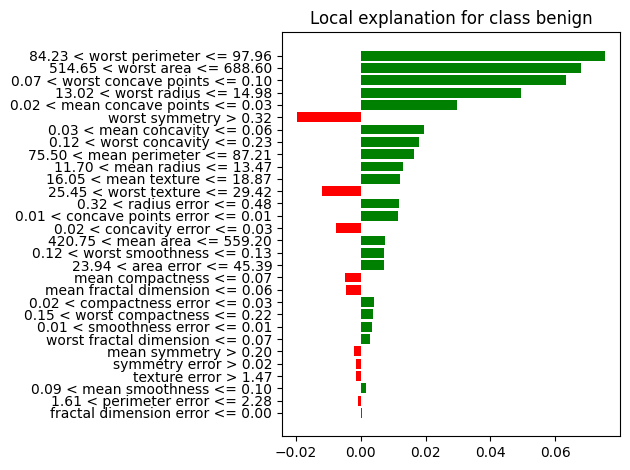

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(14.76), np.str_('mean texture'): np.float64(14.74), np.str_('mean perimeter'): np.float64(94.87), np.str_('mean area'): np.float64(668.7), np.str_('mean smoothness'): np.float64(0.08875), np.str_('mean compactness'): np.float64(0.0778), np.str_('mean concavity'): np.float64(0.04608), np.str_('mean concave points'): np.float64(0.03528), np.str_('mean symmetry'): np.float64(0.1521), np.str_('mean fractal dimension'): np.float64(0.05912), np.str_('radius error'): np.float64(0.3428), np.str_('texture error'): np.float64(0.3981), np.str_('perimeter error'): np.float64(2.537), np.str_('area error'): np.float64(29.06), np.str_('smoothness error'): np.float64(0.004732), np.str_('compactness error'): np.float64(0.01506), np.str_('concavity error'): np.float64(0.01855), np.str_('concave points error'): np.float64(0.01067), np.str_('symmetry error'): np.float64(0.02163), np.str_('fractal dimension error'): np.float64(0.0027

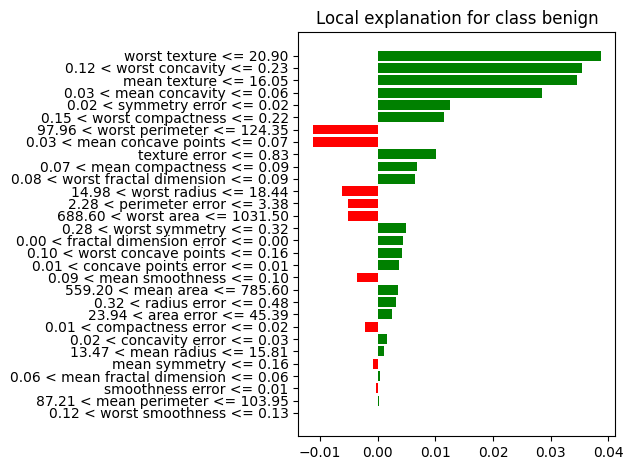

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(13.05), np.str_('mean texture'): np.float64(19.31), np.str_('mean perimeter'): np.float64(82.61), np.str_('mean area'): np.float64(527.2), np.str_('mean smoothness'): np.float64(0.0806), np.str_('mean compactness'): np.float64(0.03789), np.str_('mean concavity'): np.float64(0.000692), np.str_('mean concave points'): np.float64(0.004167), np.str_('mean symmetry'): np.float64(0.1819), np.str_('mean fractal dimension'): np.float64(0.05501), np.str_('radius error'): np.float64(0.404), np.str_('texture error'): np.float64(1.214), np.str_('perimeter error'): np.float64(2.595), np.str_('area error'): np.float64(32.96), np.str_('smoothness error'): np.float64(0.007491), np.str_('compactness error'): np.float64(0.008593), np.str_('concavity error'): np.float64(0.000692), np.str_('concave points error'): np.float64(0.004167), np.str_('symmetry error'): np.float64(0.0219), np.str_('fractal dimension error'): np.float64(0.00

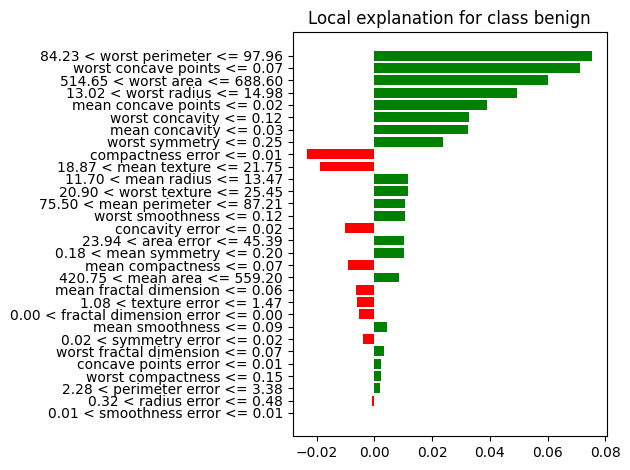

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(13.4), np.str_('mean texture'): np.float64(16.95), np.str_('mean perimeter'): np.float64(85.48), np.str_('mean area'): np.float64(552.4), np.str_('mean smoothness'): np.float64(0.07937), np.str_('mean compactness'): np.float64(0.05696), np.str_('mean concavity'): np.float64(0.02181), np.str_('mean concave points'): np.float64(0.01473), np.str_('mean symmetry'): np.float64(0.165), np.str_('mean fractal dimension'): np.float64(0.05701), np.str_('radius error'): np.float64(0.1584), np.str_('texture error'): np.float64(0.6124), np.str_('perimeter error'): np.float64(1.036), np.str_('area error'): np.float64(13.22), np.str_('smoothness error'): np.float64(0.004394), np.str_('compactness error'): np.float64(0.0125), np.str_('concavity error'): np.float64(0.01451), np.str_('concave points error'): np.float64(0.005484), np.str_('symmetry error'): np.float64(0.01291), np.str_('fractal dimension error'): np.float64(0.00207

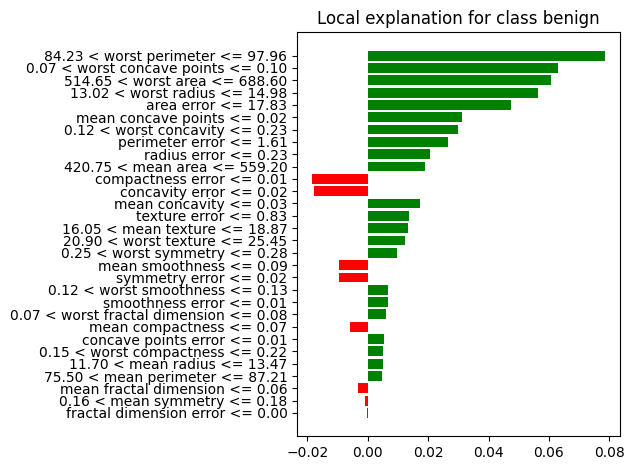

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(10.91), np.str_('mean texture'): np.float64(12.35), np.str_('mean perimeter'): np.float64(69.14), np.str_('mean area'): np.float64(363.7), np.str_('mean smoothness'): np.float64(0.08518), np.str_('mean compactness'): np.float64(0.04721), np.str_('mean concavity'): np.float64(0.01236), np.str_('mean concave points'): np.float64(0.01369), np.str_('mean symmetry'): np.float64(0.1449), np.str_('mean fractal dimension'): np.float64(0.06031), np.str_('radius error'): np.float64(0.1753), np.str_('texture error'): np.float64(1.027), np.str_('perimeter error'): np.float64(1.267), np.str_('area error'): np.float64(11.09), np.str_('smoothness error'): np.float64(0.003478), np.str_('compactness error'): np.float64(0.01221), np.str_('concavity error'): np.float64(0.01072), np.str_('concave points error'): np.float64(0.009393), np.str_('symmetry error'): np.float64(0.02941), np.str_('fractal dimension error'): np.float64(0.003

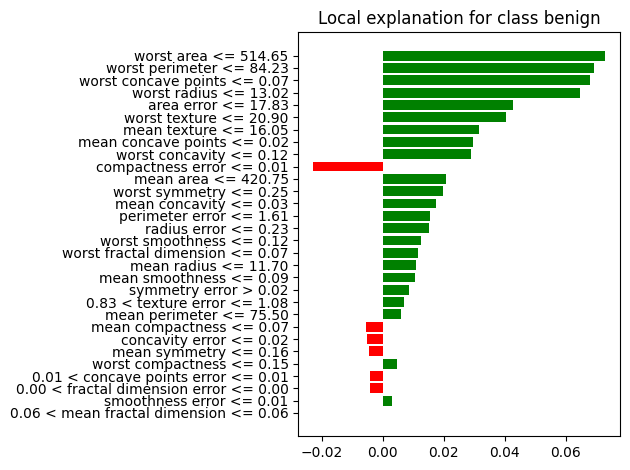

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(9.904), np.str_('mean texture'): np.float64(18.06), np.str_('mean perimeter'): np.float64(64.6), np.str_('mean area'): np.float64(302.4), np.str_('mean smoothness'): np.float64(0.09699), np.str_('mean compactness'): np.float64(0.1294), np.str_('mean concavity'): np.float64(0.1307), np.str_('mean concave points'): np.float64(0.03716), np.str_('mean symmetry'): np.float64(0.1669), np.str_('mean fractal dimension'): np.float64(0.08116), np.str_('radius error'): np.float64(0.4311), np.str_('texture error'): np.float64(2.261), np.str_('perimeter error'): np.float64(3.132), np.str_('area error'): np.float64(27.48), np.str_('smoothness error'): np.float64(0.01286), np.str_('compactness error'): np.float64(0.08808), np.str_('concavity error'): np.float64(0.1197), np.str_('concave points error'): np.float64(0.0246), np.str_('symmetry error'): np.float64(0.0388), np.str_('fractal dimension error'): np.float64(0.01792), np.

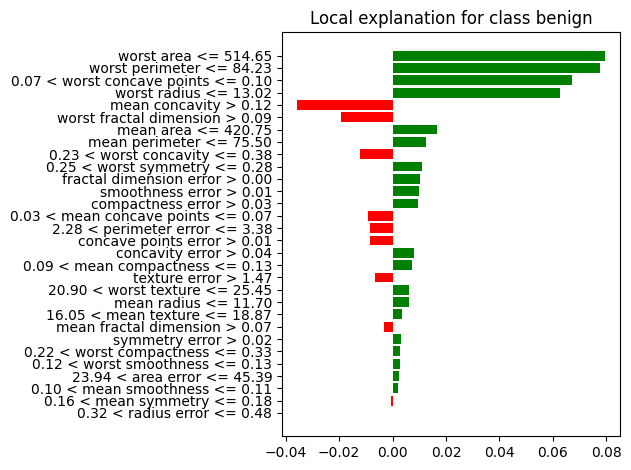

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(10.25), np.str_('mean texture'): np.float64(16.18), np.str_('mean perimeter'): np.float64(66.52), np.str_('mean area'): np.float64(324.2), np.str_('mean smoothness'): np.float64(0.1061), np.str_('mean compactness'): np.float64(0.1111), np.str_('mean concavity'): np.float64(0.06726), np.str_('mean concave points'): np.float64(0.03965), np.str_('mean symmetry'): np.float64(0.1743), np.str_('mean fractal dimension'): np.float64(0.07279), np.str_('radius error'): np.float64(0.3677), np.str_('texture error'): np.float64(1.471), np.str_('perimeter error'): np.float64(1.597), np.str_('area error'): np.float64(22.68), np.str_('smoothness error'): np.float64(0.01049), np.str_('compactness error'): np.float64(0.04265), np.str_('concavity error'): np.float64(0.04004), np.str_('concave points error'): np.float64(0.01544), np.str_('symmetry error'): np.float64(0.02719), np.str_('fractal dimension error'): np.float64(0.007596)

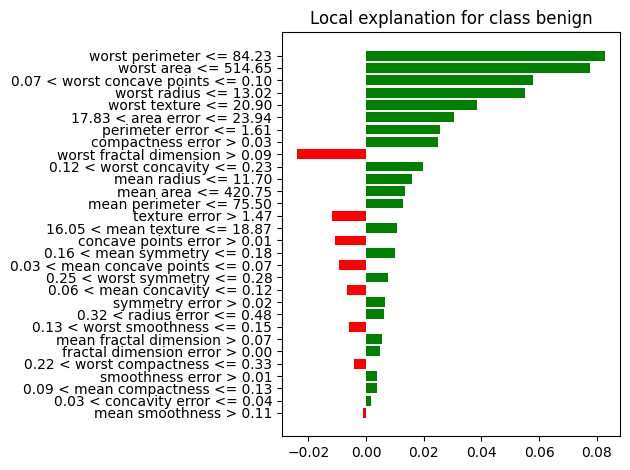

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(9.742), np.str_('mean texture'): np.float64(19.12), np.str_('mean perimeter'): np.float64(61.93), np.str_('mean area'): np.float64(289.7), np.str_('mean smoothness'): np.float64(0.1075), np.str_('mean compactness'): np.float64(0.08333), np.str_('mean concavity'): np.float64(0.008934), np.str_('mean concave points'): np.float64(0.01967), np.str_('mean symmetry'): np.float64(0.2538), np.str_('mean fractal dimension'): np.float64(0.07029), np.str_('radius error'): np.float64(0.6965), np.str_('texture error'): np.float64(1.747), np.str_('perimeter error'): np.float64(4.607), np.str_('area error'): np.float64(43.52), np.str_('smoothness error'): np.float64(0.01307), np.str_('compactness error'): np.float64(0.01885), np.str_('concavity error'): np.float64(0.006021), np.str_('concave points error'): np.float64(0.01052), np.str_('symmetry error'): np.float64(0.031), np.str_('fractal dimension error'): np.float64(0.004225

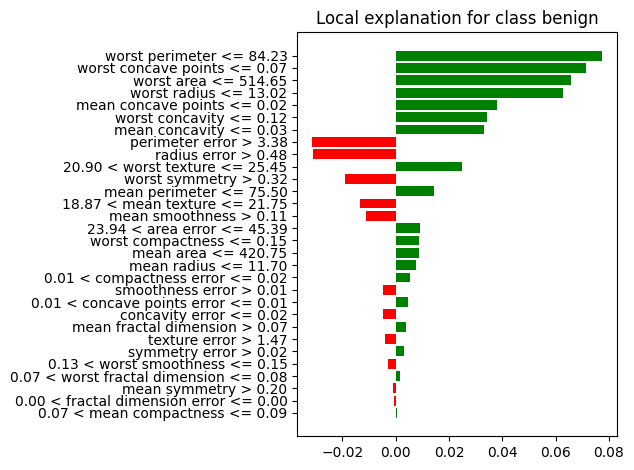

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(12.58), np.str_('mean texture'): np.float64(18.4), np.str_('mean perimeter'): np.float64(79.83), np.str_('mean area'): np.float64(489.0), np.str_('mean smoothness'): np.float64(0.08393), np.str_('mean compactness'): np.float64(0.04216), np.str_('mean concavity'): np.float64(0.00186), np.str_('mean concave points'): np.float64(0.002924), np.str_('mean symmetry'): np.float64(0.1697), np.str_('mean fractal dimension'): np.float64(0.05855), np.str_('radius error'): np.float64(0.2719), np.str_('texture error'): np.float64(1.35), np.str_('perimeter error'): np.float64(1.721), np.str_('area error'): np.float64(22.45), np.str_('smoothness error'): np.float64(0.006383), np.str_('compactness error'): np.float64(0.008008), np.str_('concavity error'): np.float64(0.00186), np.str_('concave points error'): np.float64(0.002924), np.str_('symmetry error'): np.float64(0.02571), np.str_('fractal dimension error'): np.float64(0.002

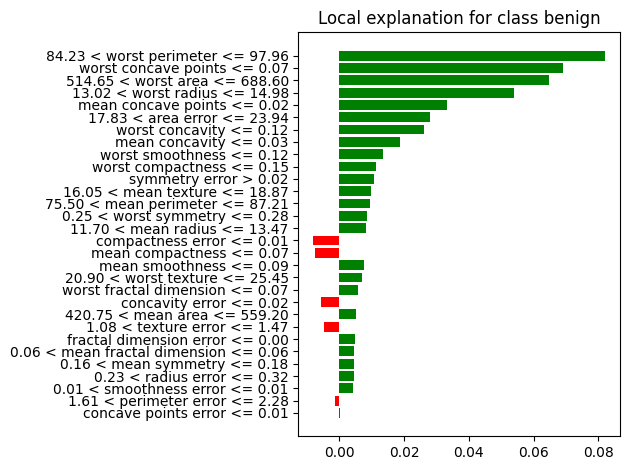

Correct:  Malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(17.75), np.str_('mean texture'): np.float64(28.03), np.str_('mean perimeter'): np.float64(117.3), np.str_('mean area'): np.float64(981.6), np.str_('mean smoothness'): np.float64(0.09997), np.str_('mean compactness'): np.float64(0.1314), np.str_('mean concavity'): np.float64(0.1698), np.str_('mean concave points'): np.float64(0.08293), np.str_('mean symmetry'): np.float64(0.1713), np.str_('mean fractal dimension'): np.float64(0.05916), np.str_('radius error'): np.float64(0.3897), np.str_('texture error'): np.float64(1.077), np.str_('perimeter error'): np.float64(2.873), np.str_('area error'): np.float64(43.95), np.str_('smoothness error'): np.float64(0.004714), np.str_('compactness error'): np.float64(0.02015), np.str_('concavity error'): np.float64(0.03697), np.str_('concave points error'): np.float64(0.0111), np.str_('symmetry error'): np.float64(0.01237), np.str_('fractal dimension error'): np.float64(0.0025

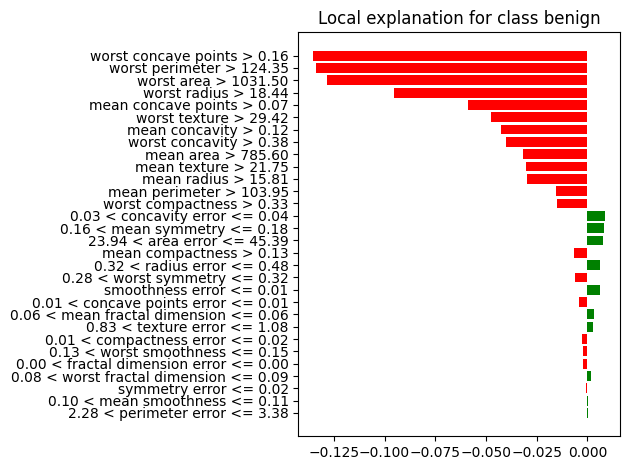

Correct:  Malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(15.37), np.str_('mean texture'): np.float64(22.76), np.str_('mean perimeter'): np.float64(100.2), np.str_('mean area'): np.float64(728.2), np.str_('mean smoothness'): np.float64(0.092), np.str_('mean compactness'): np.float64(0.1036), np.str_('mean concavity'): np.float64(0.1122), np.str_('mean concave points'): np.float64(0.07483), np.str_('mean symmetry'): np.float64(0.1717), np.str_('mean fractal dimension'): np.float64(0.06097), np.str_('radius error'): np.float64(0.3129), np.str_('texture error'): np.float64(0.8413), np.str_('perimeter error'): np.float64(2.075), np.str_('area error'): np.float64(29.44), np.str_('smoothness error'): np.float64(0.009882), np.str_('compactness error'): np.float64(0.02444), np.str_('concavity error'): np.float64(0.04531), np.str_('concave points error'): np.float64(0.01763), np.str_('symmetry error'): np.float64(0.02471), np.str_('fractal dimension error'): np.float64(0.0021

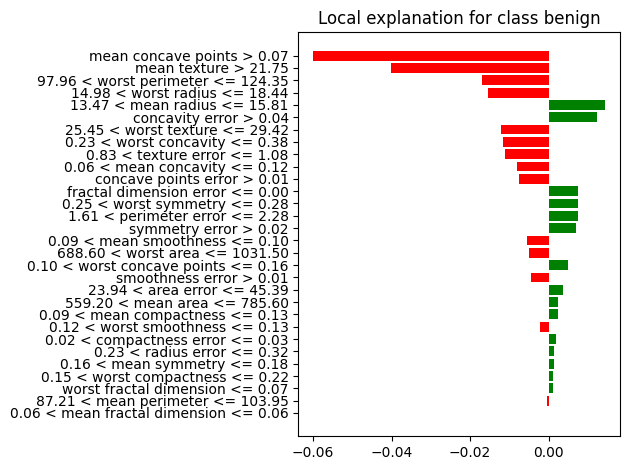

Correct:  Benign
Classification:  [0]
{np.str_('mean radius'): np.float64(17.85), np.str_('mean texture'): np.float64(13.23), np.str_('mean perimeter'): np.float64(114.6), np.str_('mean area'): np.float64(992.1), np.str_('mean smoothness'): np.float64(0.07838), np.str_('mean compactness'): np.float64(0.06217), np.str_('mean concavity'): np.float64(0.04445), np.str_('mean concave points'): np.float64(0.04178), np.str_('mean symmetry'): np.float64(0.122), np.str_('mean fractal dimension'): np.float64(0.05243), np.str_('radius error'): np.float64(0.4834), np.str_('texture error'): np.float64(1.046), np.str_('perimeter error'): np.float64(3.163), np.str_('area error'): np.float64(50.95), np.str_('smoothness error'): np.float64(0.004369), np.str_('compactness error'): np.float64(0.008274), np.str_('concavity error'): np.float64(0.01153), np.str_('concave points error'): np.float64(0.007437), np.str_('symmetry error'): np.float64(0.01302), np.str_('fractal dimension error'): np.float64(0.001

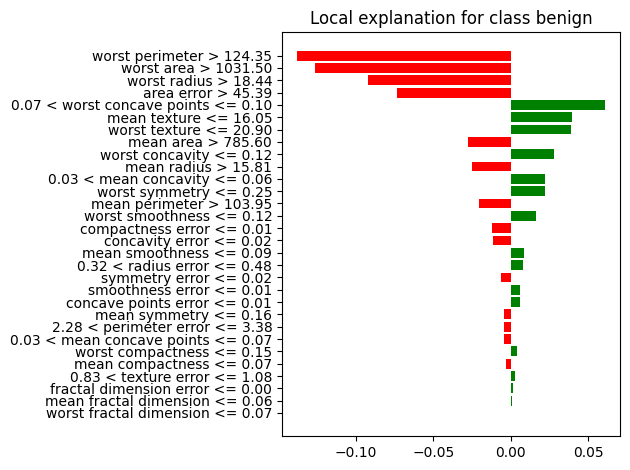

Correct:  Malignant
Classification:  [0]
{np.str_('mean radius'): np.float64(17.19), np.str_('mean texture'): np.float64(22.07), np.str_('mean perimeter'): np.float64(111.6), np.str_('mean area'): np.float64(928.3), np.str_('mean smoothness'): np.float64(0.09726), np.str_('mean compactness'): np.float64(0.08995), np.str_('mean concavity'): np.float64(0.09061), np.str_('mean concave points'): np.float64(0.06527), np.str_('mean symmetry'): np.float64(0.1867), np.str_('mean fractal dimension'): np.float64(0.0558), np.str_('radius error'): np.float64(0.4203), np.str_('texture error'): np.float64(0.7383), np.str_('perimeter error'): np.float64(2.819), np.str_('area error'): np.float64(45.42), np.str_('smoothness error'): np.float64(0.004493), np.str_('compactness error'): np.float64(0.01206), np.str_('concavity error'): np.float64(0.02048), np.str_('concave points error'): np.float64(0.009875), np.str_('symmetry error'): np.float64(0.01144), np.str_('fractal dimension error'): np.float64(0.

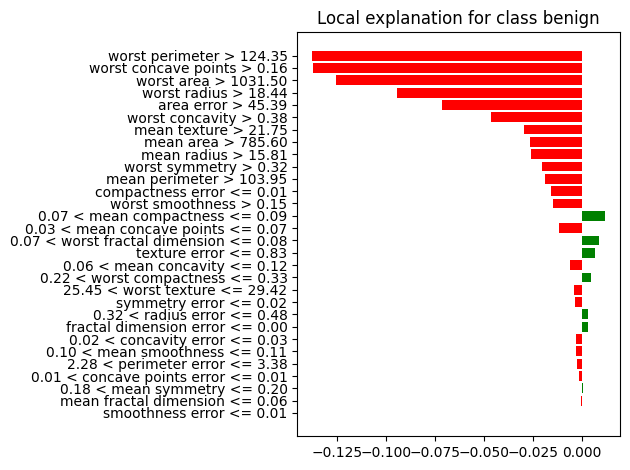

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(13.21), np.str_('mean texture'): np.float64(28.06), np.str_('mean perimeter'): np.float64(84.88), np.str_('mean area'): np.float64(538.4), np.str_('mean smoothness'): np.float64(0.08671), np.str_('mean compactness'): np.float64(0.06877), np.str_('mean concavity'): np.float64(0.02987), np.str_('mean concave points'): np.float64(0.03275), np.str_('mean symmetry'): np.float64(0.1628), np.str_('mean fractal dimension'): np.float64(0.05781), np.str_('radius error'): np.float64(0.2351), np.str_('texture error'): np.float64(1.597), np.str_('perimeter error'): np.float64(1.539), np.str_('area error'): np.float64(17.85), np.str_('smoothness error'): np.float64(0.004973), np.str_('compactness error'): np.float64(0.01372), np.str_('concavity error'): np.float64(0.01498), np.str_('concave points error'): np.float64(0.009117), np.str_('symmetry error'): np.float64(0.01724), np.str_('fractal dimension error'): np.float64(0.001

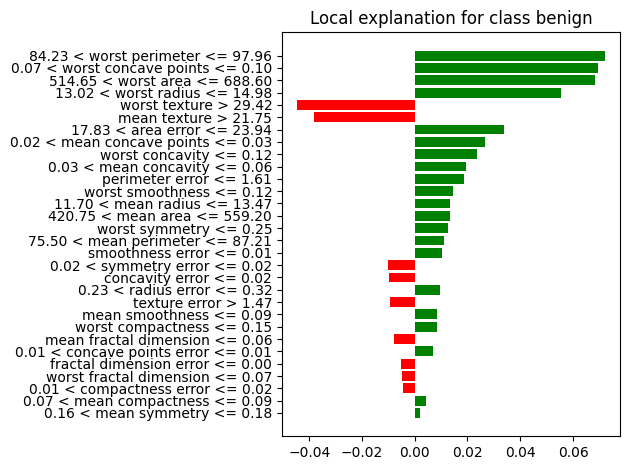

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(12.8), np.str_('mean texture'): np.float64(17.46), np.str_('mean perimeter'): np.float64(83.05), np.str_('mean area'): np.float64(508.3), np.str_('mean smoothness'): np.float64(0.08044), np.str_('mean compactness'): np.float64(0.08895), np.str_('mean concavity'): np.float64(0.0739), np.str_('mean concave points'): np.float64(0.04083), np.str_('mean symmetry'): np.float64(0.1574), np.str_('mean fractal dimension'): np.float64(0.0575), np.str_('radius error'): np.float64(0.3639), np.str_('texture error'): np.float64(1.265), np.str_('perimeter error'): np.float64(2.668), np.str_('area error'): np.float64(30.57), np.str_('smoothness error'): np.float64(0.005421), np.str_('compactness error'): np.float64(0.03477), np.str_('concavity error'): np.float64(0.04545), np.str_('concave points error'): np.float64(0.01384), np.str_('symmetry error'): np.float64(0.01869), np.str_('fractal dimension error'): np.float64(0.004067)

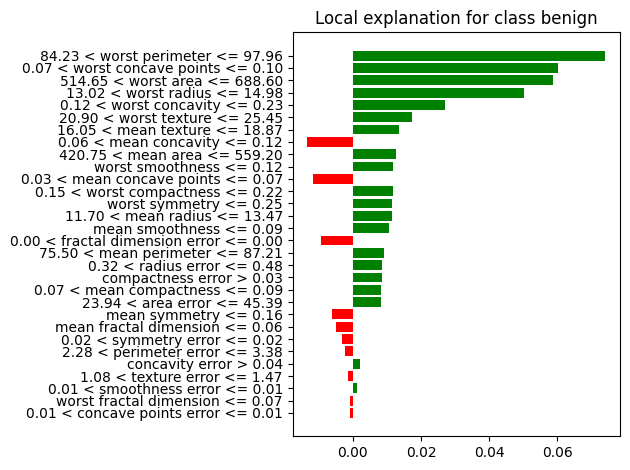

Correct:  Benign
Classification:  [1]
{np.str_('mean radius'): np.float64(11.8), np.str_('mean texture'): np.float64(17.26), np.str_('mean perimeter'): np.float64(75.26), np.str_('mean area'): np.float64(431.9), np.str_('mean smoothness'): np.float64(0.09087), np.str_('mean compactness'): np.float64(0.06232), np.str_('mean concavity'): np.float64(0.02853), np.str_('mean concave points'): np.float64(0.01638), np.str_('mean symmetry'): np.float64(0.1847), np.str_('mean fractal dimension'): np.float64(0.06019), np.str_('radius error'): np.float64(0.3438), np.str_('texture error'): np.float64(1.14), np.str_('perimeter error'): np.float64(2.225), np.str_('area error'): np.float64(25.06), np.str_('smoothness error'): np.float64(0.005463), np.str_('compactness error'): np.float64(0.01964), np.str_('concavity error'): np.float64(0.02079), np.str_('concave points error'): np.float64(0.005398), np.str_('symmetry error'): np.float64(0.01477), np.str_('fractal dimension error'): np.float64(0.00307

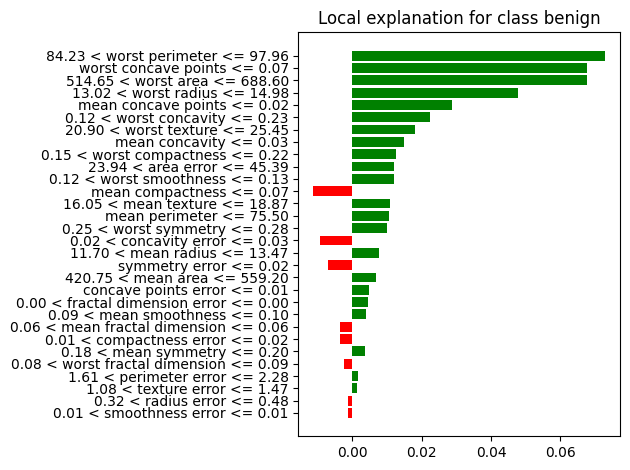

In [8]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data= X_train,
    feature_names=data['feature_names'],
    class_names=data['target_names'],
    mode='classification'
)

for i in range(20):
    print('Correct: ', 'Benign' if y_test[i] else 'Malignant')
    print ('Classification: ', forest_clf.predict([X_test[i]]))
    print(dict(zip(data['feature_names'], X_test[i])))
    
    explanation = explainer.explain_instance(
        data_row=X_test[i],
        predict_fn=forest_clf.predict_proba,
        num_features=30
    )

    fig = explanation.as_pyplot_figure()
    plt.tight_layout()
    plt.show()